# Overfitting and Regularization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Problem of Overfitting

In [2]:
X = np.linspace(0,10,100)
Y = np.sin(X)*X+np.random.randn(100)

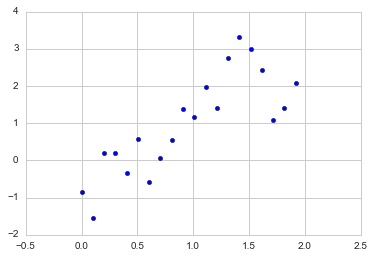

In [3]:
X,Y = np.c_[X[:20]],Y[:20]
plt.scatter(X,Y)

In [4]:
from sklearn.linear_model import LinearRegression

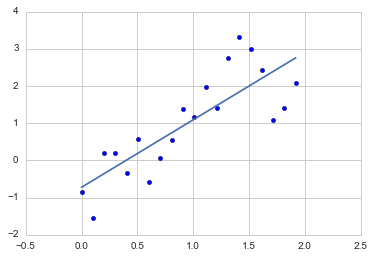

In [5]:

model = LinearRegression()
model.fit(X,Y)
plt.scatter(X,Y)
plt.plot(X,model.predict(np.c_[X]))

In [6]:
from sklearn.preprocessing import PolynomialFeatures

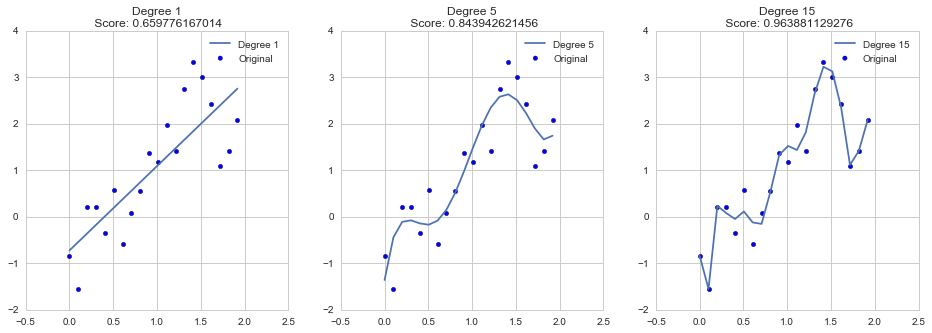

In [7]:
plt.clf()
degree = [1,5,15]
plt.figure(figsize=(16,5))
for c,i in enumerate(degree):
    ax = plt.subplot(1,len(degree),c+1)
    ax.scatter(X,Y,label='Original')
    pf = PolynomialFeatures(degree=i)
    x = pf.fit_transform(X)
    model = LinearRegression()
    model.fit(x,Y)
    ax.plot(X,model.predict(x),label='Degree %d' %i)
    plt.legend(loc='best')
    plt.title('Degree {0}\n Score: {1}'.format(i,model.score(x,Y)))


From the above plots it is clear that Degree 15 has highest **r-squared score** but also it is highly overfitted, means that it just fitted the training data as it is but it may fail to predict future values. 

So we can eliminate this overfitting by **Regularization** where the parameters $\\$ $\theta_0,\theta_1,...,\theta_n$ $\\$are penalized (shrinked) and therefore resulting in best fit.

## Regularization

It is a process of penalizing the parameters and make it less prone to overfitting.

We do this by adding a term to the cost function as follows:

### Cost Function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2+\lambda \sum_{j=1}^n \theta_j^2$$

$\lambda = $ Regularization Parameter

Note that $\theta_0$ is affected as it is multiplied to bias constant $x_0$

If $\lambda$ is very large then it will fail to fit the training set even as it makes all the parameters to zero. So we end up having $h_\theta(x) = \theta_0$.

### Gradient Descent

Repeat $\{$

$$ \theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_0^{(i)}$$

$$\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\theta_j$$

$j=1,2,3,.....,n$

$\}$

### Normal Equation

$$\theta = \left[\begin{array}{}X^TX+ \lambda \left[\begin{array}{rrrr}
    0 & 0 & .... & 0 \\
    0 & 1 & .... & 0 \\
    0 & 0 & 1 &.... \\
    ... & ... & ... & ... \\
    0 & 0 & .... & 1
  \end{array}\right]\end{array}\right]^{-1} X^TY$$

The matrix above is of order $(n+1)\times(n+1)$ since we consider $x_0$ in $X$

### For Logistic Regression

#### Cost Function

$$ J(\theta) = - \frac{1}{m} \sum_{i=1}^m y^{(i)}log \ h_\theta(x^{(i)})+(1-y^{(i)}) log \ (1-h_\theta(x^{(i)})) + \frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2$$

#### Gradient Descent

Repeat $\{$

$$ \theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_0^{(i)}$$

$$\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\theta_j$$

$j=1,2,3,.....,n$

$\}$

Same as that of linear regression but $$h_\theta(x) = \frac{1}{1+e^{-\theta^TX}} $$

### Ridge and LASSO Regression

These are the two ways of regularization where Ridge regression and LASSO regression are called **L2 norm** and **L1 norm** respectively.

The Ridge regression is same as that of we seen earlier in regularization. Therefore it's cost functon is:

$$J(\theta)_{ridge} = \frac{1}{2m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2+\lambda \sum_{j=1}^n \theta_j^2$$

Since the $\theta_j$ term is squared it is called **L2 norm**

An alternative approach that can lead to sparse models is the LASSO. Depending
on the regularization strength, certain parameters can become zero, which makes the
LASSO also useful as a supervised feature selection technique:

$$J(\theta)_{ridge} = \frac{1}{2m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2+\lambda \sum_{j=1}^n \theta_j$$

The LASSO regression is more sensitive to $\lambda$

Let's see the regularization in action.

In [8]:
pf = PolynomialFeatures(degree=15)
pf.fit(X)
x = pf.transform(X)

In [9]:
from sklearn.linear_model import Ridge

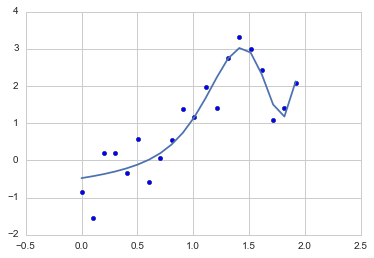

In [10]:
r_model = Ridge()
r_model.fit(x,Y)
plt.scatter(X,Y)
plt.plot(X,r_model.predict(x))

In [11]:
r_model.score(x,Y)

0.87087913264006311

In [12]:
from sklearn.linear_model import Lasso

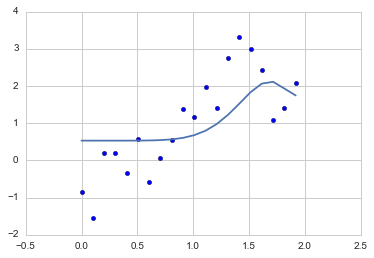

In [18]:
l_model = Lasso()
l_model.fit(x,Y)
plt.scatter(X,Y)
plt.plot(X,l_model.predict(x))

In [14]:
l_model.score(x,Y)

0.42238403800504831

### Elastic Net Regression

However, a limitation of the LASSO is that it selects at most n variables if m > n . A
compromise between Ridge regression and the LASSO is the **Elastic Net**, which has a
**L1 penalty** to generate sparsity and a **L2 penalty** to overcome some of the limitations
of the LASSO, such as the number of selected variables

In [15]:
from sklearn.linear_model import ElasticNet

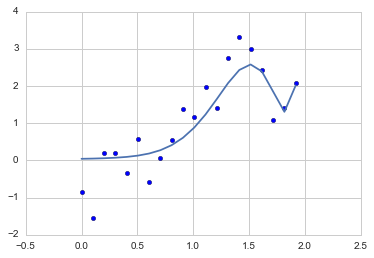

In [16]:
e_model = ElasticNet(l1_ratio=0.1)
e_model.fit(x,Y)
plt.scatter(X,Y)
plt.plot(X,e_model.predict(x))

In [17]:
e_model.score(x,Y)

0.77183056515303805